## Test pitch quality metric against pitchingbot and pitching+ metrics on fangraphs using 2023 split halves
Note: no 2023 data was used to train my metric

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [191]:
first_half = pd.read_csv('other_data/first_half_metrics.csv')
second_half = pd.read_csv('other_data/second_half_metrics.csv')

In [192]:
pitch_model_predictions = pd.read_csv('model_predictions.csv')
pitch_model_predictions['game_date'] = pd.to_datetime(pitch_model_predictions['game_date'])

In [193]:
pitch_model_predictions['half'] = np.where(pitch_model_predictions['game_date'] < '2023-07-11', 'first half', 'second half')

In [194]:
pitch_scores_by_pitch_half = pitch_model_predictions \
    .groupby(['player_name', 'pitcher', 'pitch_type', 'half'], as_index=False)['xgb_preds'] \
    .agg(['mean', 'count'])

In [195]:
pitch_scores_by_pitch_half.loc[pitch_scores_by_pitch_half['count']>100].nsmallest(25, 'mean')

player_name  pitcher pitch_type         half      mean  count
2187          Jax, Griffin   643377         ST   first half -0.022464    339
4500      Taillon, Jameson   592791         ST   first half -0.019555    169
5165         deGrom, Jacob   594798         SL   first half -0.019362    167
3079         Miller, Bobby   676272         SL   first half -0.018270    176
4960       Williams, Devin   642207         CH   first half -0.017933    304
3627         Pressly, Ryan   519151         SL  second half -0.017873    122
4002       Santos, Gregory   666619         SL   first half -0.017263    349
4058         Scott, Tanner   656945         FF  second half -0.016993    213
1875         Helsley, Ryan   664854         SL   first half -0.016732    148
1679     Graterol, Brusdar   660813         SI   first half -0.016329    231
2188          Jax, Griffin   643377         ST  second half -0.016256    194
3747       Rasmussen, Drew   656876         FC   first half -0.016243    241
812        Clase, Emmanuel   661403         SL  second half -0.016231    105
3040  Merryweather, Julian   657240         SL  second half -0.016189    251
4229          Snell, Blake   605483         CH  second half -0.016164    235
4159           Sims, Lucas   608371         SL  second half -0.015823    205
4708           Vesia, Alex   681911         FF  second half -0.015688    233
1169          Duran, Jhoan   661395         FS   first half -0.015673    142
4961       Williams, Devin   642207         CH  second half -0.015578    203
4274         Soto, Gregory   642397         SL  second half -0.015422    132
75        Alcantara, Sandy   645261         CH  second half -0.015308    279
2301        Kelly, Merrill   518876         CH   first half -0.015286    349
4649          Urías, Julio   628711         SV   first half -0.015217    296
811        Clase, Emmanuel   661403         SL   first half -0.015206    225
2316        Kelly, Michael   547184         ST  second half -0.014964    108

In [196]:
pitch_scores_by_pitcher_half = pitch_model_predictions \
    .groupby(['player_name', 'pitcher', 'half'], as_index=False)['xgb_preds'] \
    .agg(['mean', 'count'])

In [197]:
pitch_scores_by_pitcher_half.loc[pitch_scores_by_pitcher_half['count']>100].nsmallest(25, 'mean')

player_name  pitcher         half      mean  count
565           Jax, Griffin   643377   first half -0.015113    560
1055         Scott, Tanner   656945  second half -0.014457    437
214        Clase, Emmanuel   661403   first half -0.013968    650
1225           Vesia, Alex   681911  second half -0.013066    327
215        Clase, Emmanuel   661403  second half -0.012857    387
1342         deGrom, Jacob   594798   first half -0.012193    442
789   Merryweather, Julian   657240  second half -0.011383    456
479          Helsley, Ryan   664854   first half -0.011114    419
972        Rasmussen, Drew   656876   first half -0.010573    671
848          Muñoz, Andrés   662253   first half -0.010478    247
23        Alcantara, Sandy   645261  second half -0.010409   1026
783         Megill, Trevor   656730  second half -0.010392    241
886         Ortiz, Luis F.   656814   first half -0.010331    201
1120      Springs, Jeffrey   605488   first half -0.010314    211
321      Estrada, Jeremiah   669093   first half -0.010173    230
766      McClanahan, Shane   663556  second half -0.010095    323
943          Pressly, Ryan   519151  second half -0.009914    333
1143      Strider, Spencer   675911   first half -0.009877   1780
429      Graterol, Brusdar   660813   first half -0.009621    557
566           Jax, Griffin   643377  second half -0.009567    411
145         Bristo, Braden   668754   first half -0.009388    114
1271        Weissert, Greg   669711  second half -0.009266    106
1039       Santos, Gregory   666619   first half -0.008928    705
415         Glasnow, Tyler   607192   first half -0.008873    708
942          Pressly, Ryan   519151   first half -0.008757    569

In [198]:
first_half_pred = pitch_scores_by_pitcher_half[pitch_scores_by_pitcher_half['half']=='first half']

In [199]:
second_half_pred = pitch_scores_by_pitcher_half[pitch_scores_by_pitcher_half['half']=='second half']

In [200]:
first_half = first_half.merge(first_half_pred, left_on='MLBAMID', right_on='pitcher', how='left')
second_half = second_half.merge(second_half_pred, left_on='MLBAMID', right_on='pitcher', how='left')

In [201]:
first_half = first_half.rename(columns={'mean': 'avg_pitch_score', 'count': 'pitches_thrown'})
second_half = second_half.rename(columns={'mean': 'avg_pitch_score', 'count': 'pitches_thrown'})

In [203]:
first_half[['ERA', 'FIP', 'xFIP', 'botERA', 'Pitching+', 'avg_pitch_score']].corr().round(2)

ERA   FIP  xFIP  botERA  Pitching+  avg_pitch_score
ERA              1.00  0.69  0.53    0.33      -0.37             0.34
FIP              0.69  1.00  0.79    0.51      -0.51             0.47
xFIP             0.53  0.79  1.00    0.52      -0.53             0.49
botERA           0.33  0.51  0.52    1.00      -0.82             0.82
Pitching+       -0.37 -0.51 -0.53   -0.82       1.00            -0.84
avg_pitch_score  0.34  0.47  0.49    0.82      -0.84             1.00

In [204]:
full = pd.merge(first_half, second_half, on='MLBAMID', suffixes=('_1H', '_2H'))

In [205]:
full = full.rename(columns={'mean_1H': 'pitch_score_1H', 'mean_2H': 'pitch_score_2H'})

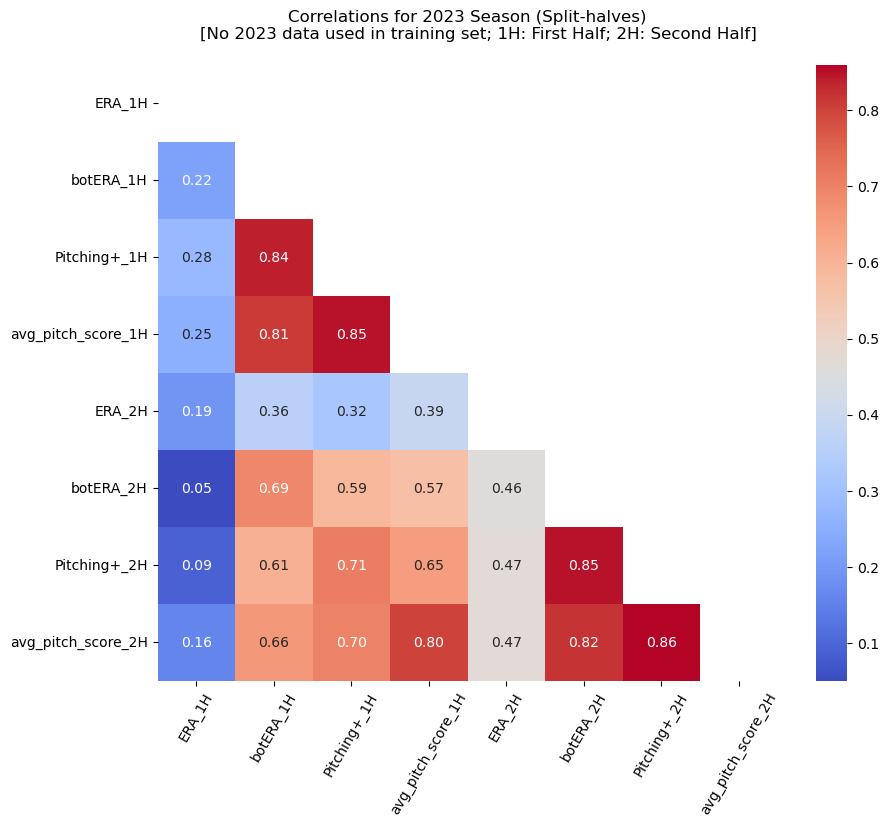

In [206]:
corr = full[['ERA_1H', 'botERA_1H', 'Pitching+_1H', 'avg_pitch_score_1H', 'ERA_2H','botERA_2H', 'Pitching+_2H', 'avg_pitch_score_2H']].corr().abs().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))  # Create a mask for the upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")  # Apply the mask to the heatmap
plt.xticks(rotation=60)
plt.title(
    """Correlations for 2023 Season (Split-halves)
    [No 2023 data used in training set; 1H: First Half; 2H: Second Half]
    """
)
plt.show()


In [ ]:
full.head()

Name_1H Team_1H  IP_1H    ERA_1H    FIP_1H   xFIP_1H  botStf_1H  \
0     Ryan Pressly     HOU   39.1  2.516949  2.724427  2.831268  63.967729   
1   Emmanuel Clase     CLE   42.2  3.375000  2.930200  3.489160  66.068863   
2      Bryan Abreu     HOU   43.0  2.720930  3.142046  2.944267  71.669387   
3  Aroldis Chapman   - - -   32.1  2.226804  1.588222  2.461864  80.000000   
4      Paul Sewald     SEA   36.1  3.220184  2.873004  3.225398  68.782028   

    Stuff+_1H     NameASCII_1H  PlayerId_1H  ...   xFIP_2H  botStf_2H  \
0  157.816253     Ryan Pressly         7005  ...  3.106380  65.504600   
1  157.451182   Emmanuel Clase        21032  ...  3.241244  71.133547   
2  139.771444      Bryan Abreu        16609  ...  4.184659  66.147909   
3  137.211902  Aroldis Chapman        10233  ...  2.440803  78.810195   
4  136.332436      Paul Sewald        13892  ...  4.751852  69.050202   

    Stuff+_2H     NameASCII_2H  PlayerId_2H    player_name_2H pitcher_2H  \
0  152.947656     Ryan Pressly         7005     Pressly, Ryan     519151   
1  150.410152   Emmanuel Clase        21032   Clase, Emmanuel     661403   
2  138.132649      Bryan Abreu        16609      Abreu, Bryan     650556   
3  132.252806  Aroldis Chapman        10233  Chapman, Aroldis     547973   
4  135.949254      Paul Sewald        13892      Sewald, Paul     623149   

       half_2H  avg_pitch_score_2H  pitches_thrown_2H  
0  second half           -0.004681                333  
1  second half           -0.011208                387  
2  second half           -0.005701                341  
3  second half           -0.004826                370  
4  second half           -0.003715                423  

[5 rows x 31 columns]

In [ ]:
import plotly.express as px

In [ ]:
px.scatter(full, x='avg_pitch_score_1H', y='Pitching+_1H', color='ERA_2H', hover_name='Name_1H', hover_data=['IP_1H', 'IP_2H'], trendline='ols')

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['Name_1H', 'Team_1H', 'IP_1H', 'ERA_1H', 'FIP_1H', 'xFIP_1H', 'botStf_1H', 'Stuff+_1H', 'NameASCII_1H', 'PlayerId_1H', 'MLBAMID', 'player_name_1H', 'pitcher_1H', 'half_1H', 'avg_pitch_score_1H', 'pitches_thrown_1H', 'Name_2H', 'Team_2H', 'IP_2H', 'ERA_2H', 'FIP_2H', 'xFIP_2H', 'botStf_2H', 'Stuff+_2H', 'NameASCII_2H', 'PlayerId_2H', 'player_name_2H', 'pitcher_2H', 'half_2H', 'avg_pitch_score_2H', 'pitches_thrown_2H'] but received: Pitching+_1H

In [ ]:
px.scatter(full, x='avg_pitch_score_1H', y='botERA_1H', color='ERA_2H', hover_name='Name_1H', hover_data=['IP_1H', 'IP_2H'], trendline='ols')

In [ ]:
px.scatter(full, x='Pitching+_1H', y='avg_pitch_score_1H', color='ERA_2H', hover_name='Name_1H', trendline='ols')

In [ ]:
fig = px.density_heatmap(data_frame=pitch_model_predictions.loc[(pitch_model_predictions['pitch_type']=='SI')&(pitch_model_predictions['p_throws']=='R')], x='plate_x', y='plate_z', z='xgb_preds', histfunc='avg', height=800, width=800)
# Add strike zone
fig.add_shape(
    type="rect",
    x0=-0.71,
    y0=1.5,
    x1=0.71,
    y1=3.5,
    line=dict(
        color="LightGray",
        width=4
    ),
)
fig.show()